# Dataset Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install category_encoders

In [ ]:
# Import the packages

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Project/train - train.csv.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Project/test - test.csv.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head(10)
df_test.head(10)

**Finding Missing Values**

In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]
missing_values

missing_values = df_test[pd.isnull(df_test).any(axis=1)]
missing_values

### Removing unnecessary columns

In [ ]:
df = df.drop(["ID", "Customer_ID", "Month", "Name", "SSN"], axis=1)
df_test = df_test.drop(["ID", "Customer_ID", "Month", "Name", "SSN"], axis=1)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
unique_values_per_column = {}

for column in df.columns:
    unique_values = df[column].unique()
    unique_values_per_column[column] = unique_values

# Display the unique values for each column
for column, values in unique_values_per_column.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values}")
    print()

In [ ]:
df = df[(df['Occupation'] != '_______')]
df = df[(df['Credit_Mix'] != '_')]
df = df[(df['Payment_of_Min_Amount'] != 'NM')]
df = df[(df['Payment_Behaviour'] != '!@9#%8')]


In [ ]:
df_test = df_test[(df_test['Occupation'] != '_______')]
df_test = df_test[(df_test['Credit_Mix'] != '_')]
df_test = df_test[(df_test['Payment_of_Min_Amount'] != 'NM')]
df_test = df_test[(df_test['Payment_Behaviour'] != '!@9#%8')]

### Category Encoding

In [ ]:
# 1 = POOR, 2 = Standard and 3 = GOOD
df["Credit_Score"] = df["Credit_Score"].apply(lambda x: 1 if x=="Poor" else (2 if x=="Standard" else 3))

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=["Occupation", "Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan", "Type_of_Loan", "Num_of_Delayed_Payment", "Num_Credit_Inquiries", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour"])

df = encoder.fit_transform(df)

In [ ]:
for mapping in encoder.category_mapping:
    column_name = mapping['col']
    original_categories = mapping['mapping']

    # Create a dictionary to manually map original to encoded values
    encoded_mapping = {category: i + 1 for i, category in enumerate(original_categories)}

    print(f"Column: {column_name}")
    print(f"Original Categories: {original_categories}")
    print(f"Encoded Mapping: {encoded_mapping}")
    print()

In [ ]:
df.describe()

In [ ]:
encoder = ce.OrdinalEncoder(cols=["Occupation","Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan", "Type_of_Loan", "Num_of_Delayed_Payment", "Num_Credit_Inquiries", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour"])

df_test = encoder.fit_transform(df_test)

In [ ]:
df_test.info()

In [ ]:
# check missing values in variables

df.isnull().sum()
print()
df_test.isnull().sum()

In [ ]:
df.replace('_', np.nan, inplace=True)
df_test.replace('_', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

df = df.fillna(df.mean())
df_test = df_test.fillna(df_test.mean())

In [ ]:
df.shape

# Exploratory Data Analysis

## Corelation between variables

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = df.corr()

ax = sns.heatmap(corr, cmap = "RdBu_r")

ax.invert_yaxis()


plt.title("Heatmap of pairwise correlation of the columns")

plt.show()

**Remarks:** There's no strong Co-Relation between the variables.

Negatively co-related features:
1. Delay_from_due_date
2. Credit_Mix
3. Outstanding_Debt
4. Payment_of_Min_Amount

## Exploring Categorical Variables

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

**Variable: Credit_Mix**

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
score_dict = {1: "poor_score", 2: "standard_score", 3:"Good_Score"}

poor_score = df[df["Credit_Score"] == 1]
standard_score = df[df["Credit_Score"] == 2]
good_score = df[df["Credit_Score"] == 3]

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Occupation']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score



layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Occupation',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


**Category Mapping (Occupation):**

Scientist: 1


Teacher  :          2

Engineer    :       3

Entrepreneur :       4

Developer  :       5

Lawyer       :     6

Media_Manager  :    7

Doctor    :        8

Journalist  :      9

Manager  :         10

Accountant :      11

Musician  :       12

Mechanic  :       13

Writer   :        14

Architect :        15

**Variable: Payment_of_Min_Amount**

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
score_dict = {1: "poor_score", 2: "standard_score", 3:"Good_Score"}

poor_score = df[df["Credit_Score"] == 1]
standard_score = df[df["Credit_Score"] == 2]
good_score = df[df["Credit_Score"] == 3]

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Payment_of_Min_Amount']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score



layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Payment_of_Min_Amount(1=No, 2=Yes))',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
score_dict = {1: "poor_score", 2: "standard_score", 3:"Good_Score"}

poor_score = df[df["Credit_Score"] == 1]
standard_score = df[df["Credit_Score"] == 2]
good_score = df[df["Credit_Score"] == 3]

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Payment_Behaviour']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score



layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Payment_Behaviour ',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


**Original Categories (Payment_Behaviour):**

Good: 1

Standard: 2

Bad: 3

## Distribution Box-Plots

In [ ]:
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

# Assuming you have three DataFrames: poor_score, standard_score, good_score

# ... (Your previous code)

def create_poor_score_trace(col, visible=False):
    return go.Box(
        y=poor_score[col],
        name='poor_score',
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color=colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Box(
        y=standard_score[col],
        name='standard_score',
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color=colors[0]),
        visible=visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Box(
        y=good_score[col],
        name='good_score',
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color=colors[2]),
        visible=visible,
    )



features_not_for_hist = ["Credit_Score"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(standard_score[col].unique())>5]

active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_poor_score + traces_standard_score + traces_good_score

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

**Remarks:**
1. As we can our dataset has a huge number of outliers. So we have to remove those outliers.

The result shows all the credit score at first then when changing the slider it dissappears.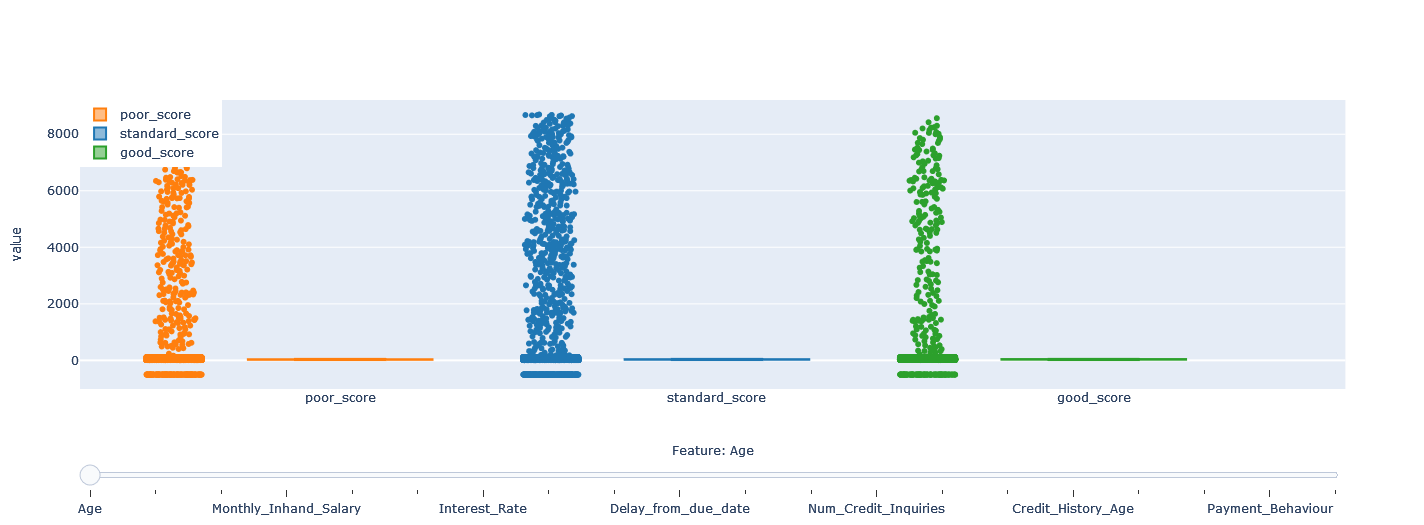

### Removing Outliers

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Specify the factor for IQR (e.g., 1.5)
iqr_factor = 1.5

# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Create a boolean mask for outliers
outliers_mask = (df < (Q1 - iqr_factor * IQR)) | (df > (Q3 + iqr_factor * IQR))

# Replace outliers with median values column-wise
df = df.where(~outliers_mask, df.median(axis=0), axis=1)

# Display the resulting DataFrame with outliers replaced by median values
print(df)

## Exploring Numerical Variables

### **Annual Income**

In [ ]:
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Annual_Income']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Annual_Income',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


**Remarks:** After 200k annual income all type of credit score decreases significantly

### **Credit_Utilization_Ratio**

In [ ]:

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Credit_Utilization_Ratio']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Credit_Utilization_Ratio',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


### **Total_EMI_per_month**

In [ ]:

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_poor_score_trace(col, visible=False):
    return go.Histogram(
        x=poor_score[col],
        name='poor_score',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_standard_score_trace(col, visible=False):
    return go.Histogram(
        x=standard_score[col],
        name='standard_score',
        marker = dict(color = colors[0]),
        visible = visible,
    )

def create_good_score_trace(col, visible=False):
    return go.Histogram(
        x=good_score[col],
        name='good_score',
        marker = dict(color = colors[2]),
        visible = visible,
    )

features_for_hist = ['Total_EMI_per_month']
active_idx = 0
traces_poor_score = [(create_poor_score_trace(col) if i != active_idx else create_poor_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_standard_score = [(create_standard_score_trace(col) if i != active_idx else create_standard_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_good_score = [(create_good_score_trace(col) if i != active_idx else create_good_score_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]

data = traces_poor_score + traces_standard_score + traces_good_score

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)


layout = dict(
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: Total_EMI_per_month',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram')


## **EXPLORING MULTIVARIATE RELATIONSHIPS - Scatter-plots**

### **2-D Scatterplots**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

label = [0, 1]
colors = ['blue', 'orange', 'red']

scatter = plt.scatter(df['Annual_Income'], df['Total_EMI_per_month'], c=df['Credit_Score'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Annual_Income')
plt.ylabel('Total_EMI_per_month')
plt.title('Scatter plot of Annual_Income against Total_EMI_per_month')

# Create a legend for each unique value in 'Credit_Score'
legend_labels = df['Credit_Score'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i % len(colors)], markersize=10, label=str(legend_label)) for i, legend_label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Credit_Score')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

label = [0, 1]
colors = ['blue', 'orange', 'red']

scatter = plt.scatter(df['Annual_Income'], df['Credit_Utilization_Ratio'], c=df['Credit_Score'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Annual_Income')
plt.ylabel('Credit_Utilization_Ratio')
plt.title('Scatter plot of Annual_Income against Credit_Utilization_Ratio')

# Create a legend for each unique value in 'Credit_Score'
legend_labels = df['Credit_Score'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i % len(colors)], markersize=10, label=str(legend_label)) for i, legend_label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Credit_Score')


### **3-D Scatterplots**

Sometimes, three-dimensional scatter plots can be helpful as well.

In [ ]:
import plotly.graph_objects as go
import numpy as np
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

x, y, z = df['Annual_Income'], df['Total_EMI_per_month'], df['Credit_Utilization_Ratio']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
    mode='markers', marker=dict(
        size=4,
        color = df['Credit_Score'].astype(int),
        opacity=0.8
    ),

    )])
fig.update_layout(scene = dict(
                    xaxis_title='Annual_Income',
                    yaxis_title='Total_EMI_per_month',
                    zaxis_title='Total_EMI_per_month'),margin=dict(l=0, r=0, b=0, t=0))
fig.show()
